# Data Understanding

What data is available to us? Where does it live? Do we have the data, or can we scrape/buy/source the data from somewhere else?

Who controls the data sources, and what steps are needed to get access to the data?

What is our target?

What predictors are available to us?

What data types are the predictors we'll be working with?

What is the distribution of our data?

How many observations does our dataset contain? Do we have a lot of data? Only a little?

Do we have enough data to build a model? Will we need to use resampling methods?

How do we know the data is correct? How is the data collected? Is there a chance the data could be wrong?

## Importing of Libraries

In [186]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

## Loading The data

In [187]:
#path = C:\Users\MNJOROGE16\Desktop\Moringa\phase_2\Group18_Phase2_Project\data\kc_house_data.csv
data_path = 'C:\\Users\\MNJOROGE16\\Desktop\\Moringa\\phase_2\\Group18_Phase2_Project\\data\\kc_house_data.csv'
kc_house_data = pd.read_csv(data_path)

kc_house_data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,...,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


## Data Exploartion

kc_house_data.info(): This provides a concise summary of the DataFrame, including the number of entries (rows), column names, non-null counts, and data types.


This helps us identify the presence of any missing values (indicated by non-null counts being less than the total number of entries).

We can see the data types of each column, which is crucial for understanding how we can manipulate or analyze them later.


In [188]:
print(kc_house_data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

kc_house_data.describe(): This gives a summary of the central tendency, dispersion, and shape of the dataset’s distribution, excluding NaN values


We get insights into metrics such as mean, standard deviation, minimum, and maximum values for numerical columns.

This helps in understanding the scale and distribution of data, identifying potential outliers, and making initial assumptions about the dataset.

In [189]:
print(kc_house_data.describe())

                 id         price      bedrooms     bathrooms   sqft_living  \
count  2.159700e+04  2.159700e+04  21597.000000  21597.000000  21597.000000   
mean   4.580474e+09  5.402966e+05      3.373200      2.115826   2080.321850   
std    2.876736e+09  3.673681e+05      0.926299      0.768984    918.106125   
min    1.000102e+06  7.800000e+04      1.000000      0.500000    370.000000   
25%    2.123049e+09  3.220000e+05      3.000000      1.750000   1430.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.159700e+04  21597.000000  19221.000000  21534.000000  21597.000000   
mean   1.509941e+04      1.494096      0.007596      0.233863      3.409825   
std    4.141264e+04      0.539683      0.086825    

### Missing Values

In [190]:
# Check for missing values
print (kc_house_data.isnull().sum())

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64


## Exploratory Data Analysis

### Histogram

Purpose: To visualize the distribution of house prices in the dataset.

Interpretation:

Skewness:

The distribution is right-skewed, with most houses priced below 1,000,000, which affects the mean

The median house prices are less than the mean

The mode is less than the median

There is a long tail extending to the right, indicating a few extremely high-priced houses.

Central Tendency:

The peak of the histogram shows the most common price range.

Why We Do This:

To understand the overall distribution and central tendency of house prices.

To identify the presence of skewness or outliers in the data.

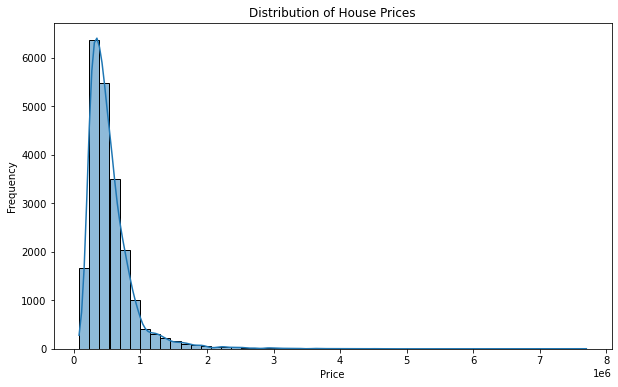

In [191]:
plt.figure(figsize=(10, 6))
sns.histplot(kc_house_data['price'], bins=50, kde=True)
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()



###  Correlation Heatmap


Purpose: The correlation heatmap visualizes the correlation coefficients between pairs of features in the dataset.

Interpretation:
Correlation Coefficient Values:

Values close to 1 indicate a strong positive correlation.

Values close to -1 indicate a strong negative correlation.

Values close to 0 indicate no correlation.


Key Observations:

price vs sqft_living: High positive correlation (0.70), indicating that as the square footage of the living area increases, the price tends to increase.

price vs grade: Strong positive correlation (0.67), suggesting that houses with better grades (quality) tend to have higher prices.

price vs sqft_above: Strong positive correlation (0.61), similar to sqft_living.

price vs bathrooms: Moderate positive correlation (0.53), indicating more bathrooms are generally associated with higher prices.


Why We Do This:

To identify which features are strongly related to the target variable (price).

To detect multicollinearity among features which can affect the performance of regression models.

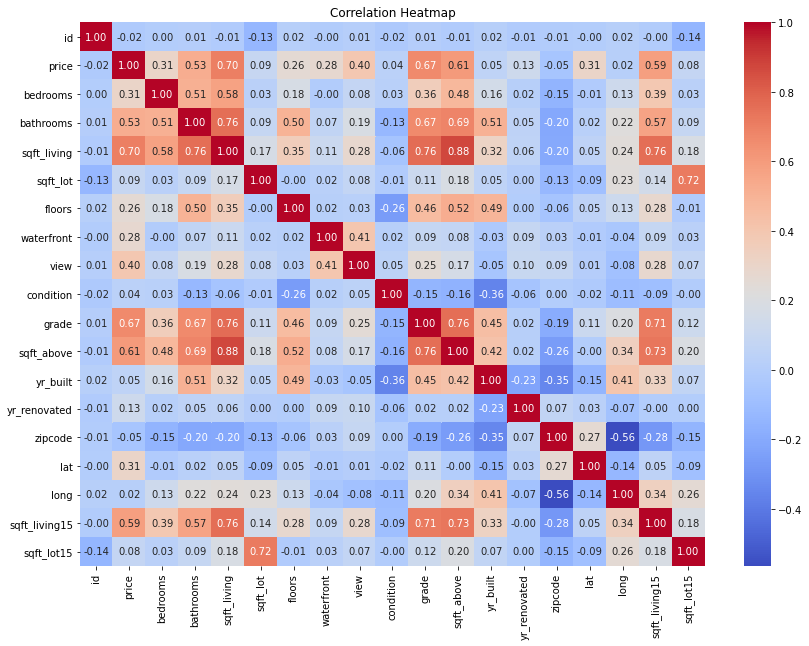

In [192]:
plt.figure(figsize=(14, 10))
corr_matrix = kc_house_data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# Data Preparation

### Removing Outliers

In [193]:
# Remove outliers by setting a threshold for price
kc_house_data = kc_house_data[kc_house_data['price'] < 3e6]

#### Convert 'date' column to datetime format

In [194]:
kc_house_data['date'] = pd.to_datetime(kc_house_data['date'])

<ipython-input-194-3aa6fcaf0613>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kc_house_data['date'] = pd.to_datetime(kc_house_data['date'])


### Handling missing values for the 'waterfront' column by replacing them with the mode

In [195]:

kc_house_data['waterfront'].fillna(kc_house_data['waterfront'].mode()[0], inplace=True)

c:\Users\MNJOROGE16\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\pandas\core\series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [196]:
print(kc_house_data.columns)


Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')


### Dropping unnecessary columns

In [197]:

kc_house_data = kc_house_data.drop(columns=['id', 'date', 'yr_built', 'view', 'yr_renovated', 'zipcode', 'sqft_lot15', 'sqft_basement' ])

#### Check for missing values

In [198]:

print("\nCount of missing values in each column:")
print(kc_house_data.isnull().sum())


Count of missing values in each column:
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
condition        0
grade            0
sqft_above       0
lat              0
long             0
sqft_living15    0
dtype: int64


In [199]:
kc_house_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21546 entries, 0 to 21596
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21546 non-null  float64
 1   bedrooms       21546 non-null  int64  
 2   bathrooms      21546 non-null  float64
 3   sqft_living    21546 non-null  int64  
 4   sqft_lot       21546 non-null  int64  
 5   floors         21546 non-null  float64
 6   waterfront     21546 non-null  float64
 7   condition      21546 non-null  int64  
 8   grade          21546 non-null  int64  
 9   sqft_above     21546 non-null  int64  
 10  lat            21546 non-null  float64
 11  long           21546 non-null  float64
 12  sqft_living15  21546 non-null  int64  
dtypes: float64(6), int64(7)
memory usage: 2.3 MB


### Splitting Data

In [200]:
X = kc_house_data.drop(columns='price')
y = kc_house_data['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Modelling

### Simple Linear

Using sqft_living as the only predictor

In [201]:
# Simple Linear Regression
X_train_simp = X_train[['sqft_living']]
X_test_simp = X_test[['sqft_living']]

lin_reg_simp = LinearRegression()
lin_reg_simp.fit(X_train_simp, y_train)

y_pred_simp = lin_reg_simp.predict(X_test_simp)

#### Evaluating Model

In [202]:
mse_simp = mean_squared_error(y_test, y_pred_simp)
r2_simp = r2_score(y_test, y_pred_simp)

print("Simple Linear Regression:")
print(f"Mean Squared Error: {mse_simp}")
print(f"R^2 Score: {r2_simp}")

Simple Linear Regression:
Mean Squared Error: 56685390842.59378
R^2 Score: 0.45860902375665724


### Multiple Linear Regression

In [203]:
lin_reg_multi = LinearRegression()
lin_reg_multi.fit(X_train, y_train)

y_pred_multi = lin_reg_multi.predict(X_test)

In [204]:
mse_multi = mean_squared_error(y_test, y_pred_multi)
r2_multi = r2_score(y_test, y_pred_multi)

print("Multiple Linear Regression:")
print(f"Mean Squared Error: {mse_multi}")
print(f"R^2 Score: {r2_multi}")

Multiple Linear Regression:
Mean Squared Error: 35686145778.972885
R^2 Score: 0.659168667368117


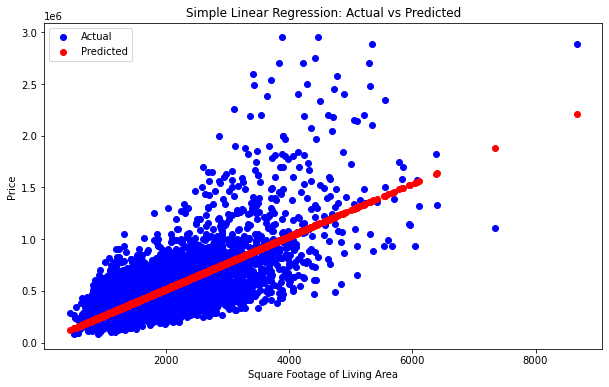

In [206]:
# Visualize the regression results
plt.figure(figsize=(10, 6))
plt.scatter(X_test_simp, y_test, color='blue', label='Actual')
plt.scatter(X_test_simp, y_pred_simp, color='red', label='Predicted')
plt.xlabel('Square Footage of Living Area')
plt.ylabel('Price')
plt.title('Simple Linear Regression: Actual vs Predicted')
plt.legend()
plt.show()



## Business Conclusions:
Model Performance:

The Multiple Linear Regression model significantly outperforms the Simple Linear Regression model in terms of both Mean Squared Error (MSE) and R^2 Score.

A lower MSE indicates that the Multiple Linear Regression model has a better fit to the data and makes more accurate predictions.

A higher R^2 score (0.6592 compared to 0.4586) suggests that the Multiple Linear Regression model explains a greater proportion of the variance in the dependent variable, making it a more reliable model for predicting outcomes.

Complexity and Predictive Power:


The improvement in performance with the Multiple Linear Regression model suggests that incorporating multiple predictors provides a more comprehensive understanding of the factors influencing the target variable.

This implies that the relationship between the predictors and the target variable is likely complex and cannot be captured adequately by a single predictor.

Business Implications:


For decision-making purposes, the Multiple Linear Regression model should be preferred over the Simple Linear Regression model due to its higher accuracy and better explanatory power.

This enhanced model can be used to make more informed and accurate predictions, leading to better strategic decisions.

The business should consider the additional predictors used in the Multiple Linear Regression model to identify key drivers and potentially leverage these insights for targeted interventions or optimizations.

Model Adoption:

Given the better performance metrics, the business should invest in developing and maintaining the Multiple Linear Regression model.

Training and resources should be allocated to understand and utilize this model effectively, ensuring that the relevant data is continuously updated and the model is regularly evaluated for performance.